In [25]:
import cv2
import pupil_apriltags as apriltag
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import json

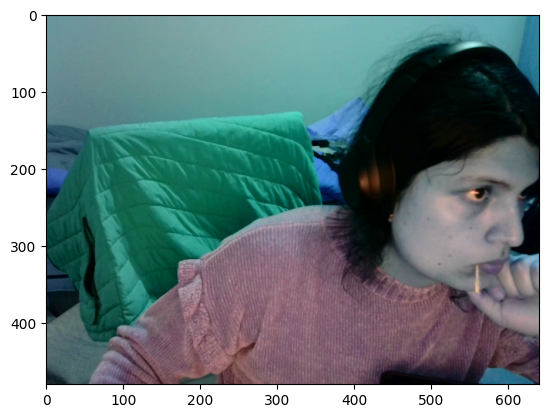

In [26]:
camera_id = 2
cap = cv2.VideoCapture(camera_id)
ret, frame = cap.read()
plt.imshow(frame)
cap.release()

In [27]:
def load_calibration_file(calibration_file_path):
    #reconstruct the camera matrix and distortion coefficients
    with open(calibration_file_path, 'r') as infile:
        reconstruction = json.load(infile)
        mtx = np.array(reconstruction['mtx'])
        dist = np.array(reconstruction['dist'])
    return mtx, dist
calibration_path = r'calibration_data.json'
mtx, dist = load_calibration_file(calibration_path)
fx, fy, cx, cy = mtx[0,0], mtx[1,1], mtx[0,2], mtx[1,2]
mtx = [fx, fy, cx, cy]

In [28]:
def detector_superimpose(img, detector, tag_size=0.16):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    detections = detector.detect(gray, estimate_tag_pose= True, camera_params=(mtx), tag_size=tag_size)
    for d in detections:
        pose_data = d.pose_R, d.pose_t
        rvec, tvec = pose_data[0], pose_data[1]
        quat = sp.spatial.transform.Rotation.from_matrix(rvec).as_quat()
        euler = sp.spatial.transform.Rotation.from_matrix(rvec).as_euler('xyz', degrees=True)
        x, y, z = euler[0], euler[1], euler[2]
        
        cv2.circle(img, (int(d.center[0]), int(d.center[1])), 5, (0, 0, 255), -1)
        cv2.putText(img, str(d.tag_id), (int(d.center[0]), int(d.center[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        #draw angle and position of tag
        cv2.putText(img, "x: " + str(round(x, 2)), (int(d.center[0]), int(d.center[1]) + 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        cv2.putText(img, "y: " + str(round(y, 2)), (int(d.center[0]), int(d.center[1]) + 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        cv2.putText(img, "z: " + str(round(z, 2)), (int(d.center[0]), int(d.center[1]) + 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        print("tvex: ", tvec)
        #shape:  (3, 1)
        print("shape: ", tvec.shape)
        cv2.putText(img, "t x: " + str(round(tvec[0][0], 2)), (int(d.center[0]), int(d.center[1]) + 80), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        cv2.putText(img, "t y: " + str(round(tvec[1][0], 2)), (int(d.center[0]), int(d.center[1]) + 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        cv2.putText(img, "t z: " + str(round(tvec[2][0], 2)), (int(d.center[0]), int(d.center[1]) + 120), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    return img
        
def live_feed(camera_id):
    cap = cv2.VideoCapture(camera_id)
    detector = apriltag.Detector(families='tag36h11', nthreads=1, quad_decimate=1.0, quad_sigma=0.0, refine_edges=1, decode_sharpening=0.25, debug=0)
    while True:
        ret, frame = cap.read()
        if ret:
            frame = detector_superimpose(frame, detector)
            cv2.imshow('frame', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            print("error reading frame")
            break
    cap.release()
    cv2.destroyAllWindows()
    
live_feed(camera_id)

tvex:  [[-0.2287289 ]
 [ 0.10058185]
 [ 0.96573678]]
shape:  (3, 1)
tvex:  [[-0.2287289 ]
 [ 0.10058185]
 [ 0.96573678]]
shape:  (3, 1)
tvex:  [[-0.22224249]
 [ 0.10471568]
 [ 0.90115678]]
shape:  (3, 1)
tvex:  [[-0.22224249]
 [ 0.10471568]
 [ 0.90115678]]
shape:  (3, 1)
tvex:  [[-0.21965961]
 [ 0.10867778]
 [ 0.89316236]]
shape:  (3, 1)
tvex:  [[-0.21965961]
 [ 0.10867778]
 [ 0.89316236]]
shape:  (3, 1)
tvex:  [[-0.21638566]
 [ 0.10853929]
 [ 0.89924059]]
shape:  (3, 1)
tvex:  [[-0.21226497]
 [ 0.10381097]
 [ 0.89906522]]
shape:  (3, 1)
tvex:  [[-0.21226497]
 [ 0.10381097]
 [ 0.89906522]]
shape:  (3, 1)
tvex:  [[-0.21224368]
 [ 0.09807664]
 [ 0.90428349]]
shape:  (3, 1)
tvex:  [[-0.21224368]
 [ 0.09807664]
 [ 0.90428349]]
shape:  (3, 1)
tvex:  [[-0.21238668]
 [ 0.09399912]
 [ 0.90376819]]
shape:  (3, 1)
tvex:  [[-0.21238668]
 [ 0.09399912]
 [ 0.90376819]]
shape:  (3, 1)
tvex:  [[-0.2122425 ]
 [ 0.09352167]
 [ 0.90297492]]
shape:  (3, 1)
tvex:  [[-0.21191476]
 [ 0.09355464]
 [ 0.903906

In [31]:
import serial

ser = serial.Serial('COM3', 9600, timeout=1)
ser.flush()
ser.write(b"hello\n")
ser.close()